## Basic organization of behavior data


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from base import MultiDaysBeaconPosition

In [7]:
root_path = '../Data/Raw/'
rat_id = 'FS10'
rat_subdirectories = glob(root_path+rat_id+'/*/' )


In [35]:
print(rat_subdirectories)

['../Data/Raw/FS10/BPositions_FS10_20211025-143051/', '../Data/Raw/FS10/BPositions_FS10_20211101-184002/', '../Data/Raw/FS10/BPositions_FS10_20211015-161036/', '../Data/Raw/FS10/BPositions_FS10_20211103-135341/', '../Data/Raw/FS10/BPositions_FS10_20211022-142453/', '../Data/Raw/FS10/BPositions_FS10_20211014-160224/', '../Data/Raw/FS10/BPositions_FS10_20211029-155803/', '../Data/Raw/FS10/BPositions_FS10_20211007-150456/', '../Data/Raw/FS10/BPositions_FS10_20211026-152717/', '../Data/Raw/FS10/BPositions_FS10_20211023-191308/', '../Data/Raw/FS10/BPositions_FS10_20211019-170531/', '../Data/Raw/FS10/BPositions_FS10_20211011-094820/', '../Data/Raw/FS10/BPositions_FS10_20211102-210824/', '../Data/Raw/FS10/BPositions_FS10_20211027-184908/', '../Data/Raw/FS10/BPositions_FS10_20211006-154014/']


In [23]:
def get_tags(rat_subdirectory):
    '''
    get time_id/tags from the subdirectories of rat
    '''
    tags = []
    for sub in rat_subdirectory:
        
        # eg of sub: '../Data/Raw/FS10/BPositions_FS10_20211025-143051/', so first replace / with _, and split it to get 20211025-143051
        tag = sub.replace('/','_').split('_')[-2]  
        tags.append(tag)
        
    return tags

In [24]:
tags = get_tags(rat_subdirectories)

In [ ]:
this_rat = MultiDaysBeaconPosition(rat_subdirectories, tags, has_beacon= True, has_metadata=True)

In [32]:
rat_sub = glob(root_path+rat_id + '/*%s/'%tags[0] +'*.txt')

In [50]:
this_rat.dataset_list[0].position_data.shape

(108578, 4)

In [34]:
rat_sub

['../Data/Raw/FS10/BPositions_FS10_20211025-143051/position_20211025-143051.txt',
 '../Data/Raw/FS10/BPositions_FS10_20211025-143051/beacon_entry_20211025-143051.txt',
 '../Data/Raw/FS10/BPositions_FS10_20211025-143051/metadata_20211025-143051.txt',
 '../Data/Raw/FS10/BPositions_FS10_20211025-143051/beacons_20211025-143051.txt']

In [86]:
position_data = pd.read_csv(rat_sub[0], sep=" ", header=None)

In [88]:
position_data = position_data.to_numpy()[:,[0,1,3,2,4,5,6]]

In [89]:
position_data.shape

(108578, 7)

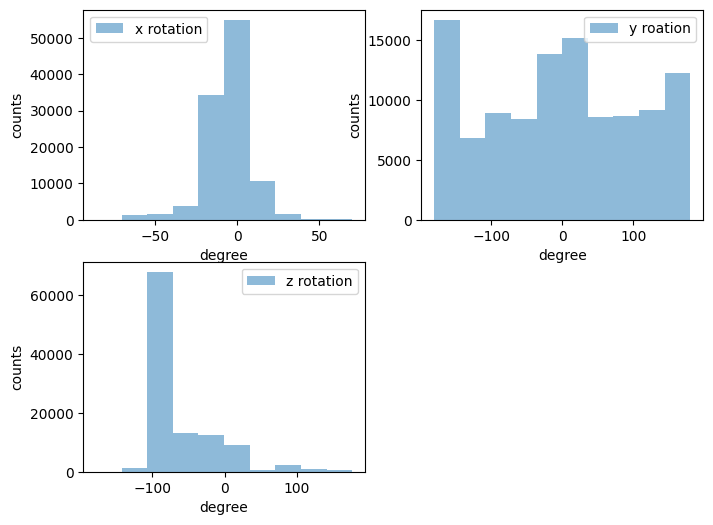

In [90]:
x = np.linspace(0,30, len(position_data[:,0]))
fig, axes = plt.subplots(2,2,figsize = (8,6))
axes = axes.flatten()
axes[-1].remove()
i = 0
for loc, label in zip([4,5,6],['x rotation','y roation','z rotation']):
    axes[i].hist(position_data[:,loc],label=label, alpha=0.5)
    
    axes[i].legend()
    axes[i].set_xlabel('degree')
    axes[i].set_ylabel('counts')
    i += 1

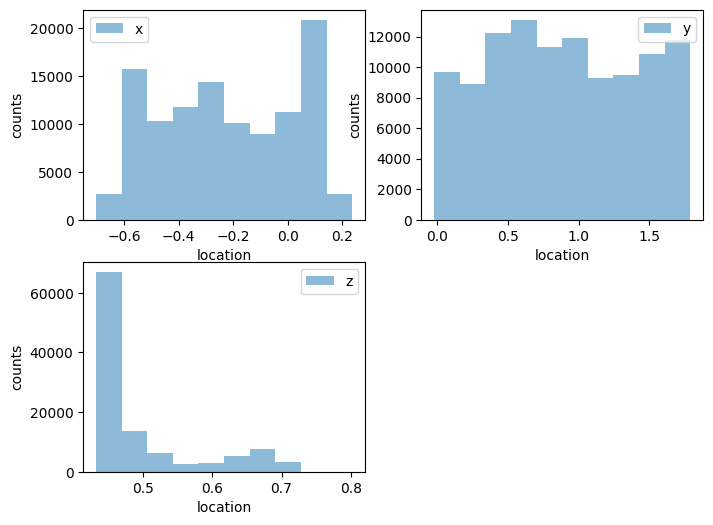

In [91]:
x = np.linspace(0,30, len(position_data[:,0]))
fig, axes = plt.subplots(2,2,figsize = (8,6))
axes = axes.flatten()
axes[-1].remove()
i = 0
for loc, label in zip([1,2,3],['x','y','z']):
    axes[i].hist(position_data[:,loc],label=label, alpha=0.5)
    
    axes[i].legend()
    axes[i].set_xlabel('location')
    axes[i].set_ylabel('counts')
    i += 1